# มี pip install ทุกอย่าง กับ import

In [1]:
#!pip install pandas
#!pip install imblearn
#!pip install emoji
#!pip install module_a
#!pip install matplotlib
#!pip install nltk
#!pip install sklearn
#!pip install tensorflow
#!pip install wheel
#!pip3 install -U scikit-learn scipy matplotlib
#!pip install wordcloud
#!pip install imblearn
#!pip install wheel
#!pip install emoji
#!pip install module_a
#!pip install mathplotlib
#!pip install plotly

In [2]:
import emoji
import wordcloud as wc
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from numpy import mean
from joblib import Parallel, delayed
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold                                     
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import re, string
import emoji
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn import preprocessing
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import numpy as np


# อ่านไฟล์ จากที่อยู่ภายในเครื่อง
## และแสดงข้อมูล tweet_text 5อันดับแรกที่ยังไม่clean



In [3]:
df = pd.read_csv("cyberbullying_tweets.csv")
df.head(20)

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
5,"@Raja5aab @Quickieleaks Yes, the test of god i...",not_cyberbullying
6,Itu sekolah ya bukan tempat bully! Ga jauh kay...,not_cyberbullying
7,Karma. I hope it bites Kat on the butt. She is...,not_cyberbullying
8,@stockputout everything but mostly my priest,not_cyberbullying
9,Rebecca Black Drops Out of School Due to Bully...,not_cyberbullying


## แสดง กราฟ จำนวนข้อความในแต่ละ class

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64
47692


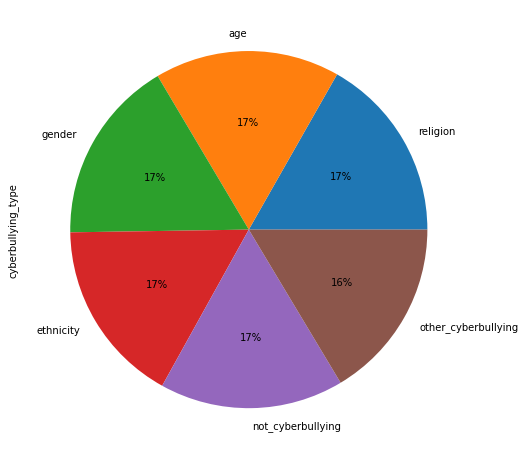

In [4]:
print(df["cyberbullying_type"].value_counts())
plt.figure(figsize=[8, 10])
df["cyberbullying_type"].value_counts().plot(kind='pie', autopct='%1.0f%%')
print(len(df["tweet_text"]))

### import เครื่องมือต่างๆที่ใช้ในการclean text

In [5]:
import re 
import pickle
#!pip install emot
import pickle
from emot.emo_unicode import UNICODE_EMOJI # For emojis
from emot.emo_unicode import EMOTICONS_EMO # For EMOTICONS
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
stop_words = set(stopwords.words('english'))

# การ clean ข้อมูล ของ text
### ใน tweet_text จะมีพวก emoji ตัวเลข สัญลักษณ์ หรือ คำซ้ำ เราจะทำการตัดออกก่อน
### และเปลี่ยน ตัวอักษร ทุกตัวเป็น พิมพ์เล็ก และ คำย่อต่างๆเช่น can't เปลี่ยนเป็น can not หรือ I'm เป็น i am
เปลี่ยน คำเป็น รากศัพท์ 

In [6]:
##CUSTOM DEFINED FUNCTIONS TO CLEAN THE TWEETS

#Clean emojis from text


#Remove punctuations, links, stopwords, mentions and \r\n new line characters
def strip_all_entities(text): 
    text = text.replace('\r', '').replace('\n', ' ').lower() #remove \n and \r and lowercase
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #remove links and mentions
    text = re.sub(r'[^\x00-\x7f]',r'', text) #remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'
    banned_list= string.punctuation
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    text = [word for word in text.split() if word not in stop_words]
    text = ' '.join(text)
    text =' '.join(word for word in text.split() if len(word) < 14) # remove words longer than 14 characters
    return text

#remove contractions
def decontract(text):
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text

#clean hashtags at the end of the sentence, and keep those in the middle of the sentence by removing just the "#" symbol
def clean_hashtags(tweet):
    new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet)) #remove last hashtags
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet)) #remove hashtags symbol from words in the middle of the sentence
    return new_tweet2

#Filter special characters such as "&" and "$" present in some words
def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

#Remove multiple sequential spaces
def remove_mult_spaces(text):
    return re.sub("\s\s+" , " ", text)

#Stemming
def stemmer(text):
    tokenized = nltk.word_tokenize(text)
    ps = PorterStemmer()
    return ' '.join([ps.stem(words) for words in tokenized])

#Lemmatization 
#NOTE:Stemming seems to work better for this dataset
def lemmatize(text):
    tokenized = nltk.word_tokenize(text)
    lm = WordNetLemmatizer()
    return ' '.join([lm.lemmatize(words) for words in tokenized])

#Then we apply all the defined functions in the following order
def deep_clean(text):
   
    text = decontract(text)
    text = strip_all_entities(text)
    text = clean_hashtags(text)
    text = filter_chars(text)
    text = remove_mult_spaces(text)
    text = stemmer(text)
    return text

จะเป็นการวนซ้ำส่งข้อความเข้าไปใน function เพื่่อ clean text จากนั้น เอาไปแทนที่ column  df['tweet_text']  เดิม

In [7]:
texts_new = []
for t in df.tweet_text:
    texts_new.append(deep_clean(t))

In [8]:
df['tweet_text'] = texts_new

# ส่วนนี้คือการแบ่งข้อมูลไว้ train 60 test 40

In [9]:
msg_train,msg_test,label_train,label_test = train_test_split(df['tweet_text'],df['cyberbullying_type'],test_size=0.4)

In [10]:
print(len(msg_train),len(msg_test),len(label_train),len(label_test))

28615 19077 28615 19077


In [11]:
pipeline = Pipeline([
   ( 'bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB()),
    ])

In [12]:

scores = cross_val_score(pipeline, X=msg_train, y=label_train, cv=10, n_jobs=-1)
print('Cross Validation accuracy scores: %s' % scores)

Cross Validation accuracy scores: [0.7382949  0.74248777 0.73305381 0.7386443  0.73759609 0.73505767
 0.73261098 0.72527088 0.73365956 0.73925201]


In [13]:
print('avg accuracy : %.3f' % (mean(scores*100)),"%")

avg accuracy : 73.559 %


In [14]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [15]:
predictions = pipeline.predict(msg_test)

In [16]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(predictions,label_test))

                     precision    recall  f1-score   support

                age       0.98      0.66      0.79      4695
          ethnicity       0.92      0.84      0.88      3564
             gender       0.81      0.80      0.81      3239
  not_cyberbullying       0.34      0.69      0.45      1546
other_cyberbullying       0.40      0.61      0.49      2026
           religion       0.97      0.78      0.87      4007

           accuracy                           0.74     19077
          macro avg       0.74      0.73      0.71     19077
       weighted avg       0.82      0.74      0.76     19077



-------------------------------------------------------------------------------
# ส่วน ของ  Deep learning

In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers, callbacks
from tensorflow.keras import Model, Sequential
from nltk.stem import SnowballStemmer
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

## ต้อง encoder โดยการแปลง class เป็นตัวเลข โดย project นี้ มี  6 คลาส

In [18]:
encoder = LabelEncoder()
df['Label'] = encoder.fit_transform(df['cyberbullying_type'])
df.head()

,tweet_text,cyberbullying_type,Label
0,word katandandr food crapilici mkr,not_cyberbullying,3
1,aussietv white mkr theblock today sunris studi...,not_cyberbullying,3
2,classi whore red velvet cupcak,not_cyberbullying,3
3,meh p thank head concern anoth angri dude twitter,not_cyberbullying,3
4,isi account pretend kurdish account like islam...,not_cyberbullying,3


In [19]:
df.head(20)

,tweet_text,cyberbullying_type,Label
0,word katandandr food crapilici mkr,not_cyberbullying,3
1,aussietv white mkr theblock today sunris studi...,not_cyberbullying,3
2,classi whore red velvet cupcak,not_cyberbullying,3
3,meh p thank head concern anoth angri dude twitter,not_cyberbullying,3
4,isi account pretend kurdish account like islam...,not_cyberbullying,3
5,ye test god good bad indiffer weird whatev pro...,not_cyberbullying,3
6,itu sekolah ya bukan tempat bulli ga jauh kaya...,not_cyberbullying,3
7,karma hope bite kat butt nasti mkr,not_cyberbullying,3
8,everyth mostli priest,not_cyberbullying,3
9,rebecca black drop school due bulli,not_cyberbullying,3


In [20]:
num_classes = df.Label.nunique()
print(num_classes)

6


In [21]:
df['length'] = df['tweet_text'].apply(len)
df.head()

,tweet_text,cyberbullying_type,Label,length
0,word katandandr food crapilici mkr,not_cyberbullying,3,34
1,aussietv white mkr theblock today sunris studi...,not_cyberbullying,3,77
2,classi whore red velvet cupcak,not_cyberbullying,3,30
3,meh p thank head concern anoth angri dude twitter,not_cyberbullying,3,49
4,isi account pretend kurdish account like islam...,not_cyberbullying,3,50


In [22]:
max_len_words = max(list(df['tweet_text'].apply(len)))
print(max_len_words)

2236


c:\Users\domok\anaconda3\envs\projectTest\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


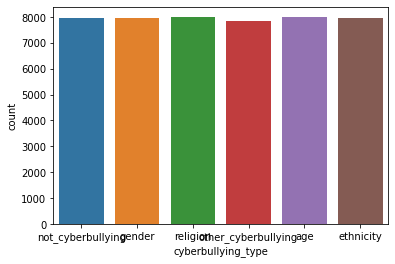

In [23]:
sns.countplot(df.cyberbullying_type	)
plt.show()

# ทำtokenizer 
### โดยการแปลง คำเป็นตัวเลข 

In [24]:
def tokenizer(x_train, y_train, max_len_word):
    # because the data distribution is imbalanced, "stratify" is used
    X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, 
                                                      test_size=.2, shuffle=True, 
                                                      stratify=y_train, random_state=0)

    # Tokenizer 
    tokenizer = Tokenizer(num_words=5000)
    tokenizer.fit_on_texts(X_train)
    sequence_dict = tokenizer.word_index
    word_dict = dict((num, val) for (val, num) in sequence_dict.items())

    # Sequence data
    train_sequences = tokenizer.texts_to_sequences(X_train)
    train_padded = pad_sequences(train_sequences,
                                 maxlen=max_len_word,
                                 truncating='post',
                                 padding='post')
   #padding
    val_sequences = tokenizer.texts_to_sequences(X_val)
    val_padded = pad_sequences(val_sequences,
                                maxlen=max_len_word,
                                truncating='post',
                                padding='post', )

    print(train_padded.shape)
    print(val_padded.shape)
    print('Total words: {}'.format(len(word_dict)))
    return train_padded, val_padded, y_train, y_val, word_dict,tokenizer

X_train, X_val, y_train, y_val, word_dict ,tokenizertotal= tokenizer(df.tweet_text, df.Label, 100)

(38153, 100)
(9539, 100)
Total words: 31017


สร้าง model โดย มี 6 layer 
layer  1 ทำ wordemdedding
layer  2  ทำ Bidirectional  เทรนข้อมูลไป2 ทิศทางหน้าหลัง


# softmax


In [25]:
model = Sequential([
    layers.Embedding(5000, 100, input_length=100),
    ##layers.Bidirectional(layers.LSTM(64, return_sequences=True, recurrent_dropout=0.4)),
    #layers.LSTM(64, return_sequences=True, recurrent_dropout=0.4),
    #layers.BatchNormalization(),
    layers.GlobalAveragePooling1D(),    # or layers.Flatten()
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(num_classes, activation='softmax')
])

ใช้ loss function  SparseCategoricalCrossentropy เพราะ มีหลายคลาส

In [40]:
model.summary()
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          500000    
                                                                 
 global_average_pooling1d (G  (None, 100)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 64)                6464      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 6)                 390       
                                                                 
Total params: 506,854
Trainable params: 506,854
Non-trainable params: 0
__________________________________________________

In [41]:
import time
start = time.perf_counter()
early_stopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                         mode ="min", patience=3)

history = model.fit(X_train, y_train,
                    epochs=10, 
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping], 
                    shuffle=True)

elapsed = time.perf_counter() - start
print('Elapsed %.3f seconds.' % elapsed)

Epoch 1/10
1193/1193 [==============================] - 6s 4ms/step - loss: 1.5006 - accuracy: 0.3877 - val_loss: 1.7996 - val_accuracy: 0.1682
Epoch 2/10
1193/1193 [==============================] - 5s 4ms/step - loss: 2.0470 - accuracy: 0.1676 - val_loss: 1.8047 - val_accuracy: 0.1675
Epoch 3/10
1193/1193 [==============================] - 5s 4ms/step - loss: 1.9958 - accuracy: 0.1684 - val_loss: 1.7951 - val_accuracy: 0.1679
Epoch 4/10
1193/1193 [==============================] - 5s 4ms/step - loss: 1.8009 - accuracy: 0.1658 - val_loss: 1.8062 - val_accuracy: 0.1674
Epoch 5/10
1193/1193 [==============================] - 5s 4ms/step - loss: 1.8009 - accuracy: 0.1635 - val_loss: 1.8064 - val_accuracy: 0.1668
Epoch 6/10
1193/1193 [==============================] - 5s 4ms/step - loss: 1.8080 - accuracy: 0.1664 - val_loss: 1.8248 - val_accuracy: 0.1673
Elapsed 31.575 seconds.


In [28]:
model.evaluate(X_val,y_val)


299/299 [==============================] - 1s 2ms/step - loss: 0.4577 - accuracy: 0.8227


[0.457679808139801, 0.8227277398109436]

In [29]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history,num):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title(f'Training and validation accuracy {num}')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title(f'Training and validation loss {num}')
    plt.legend()

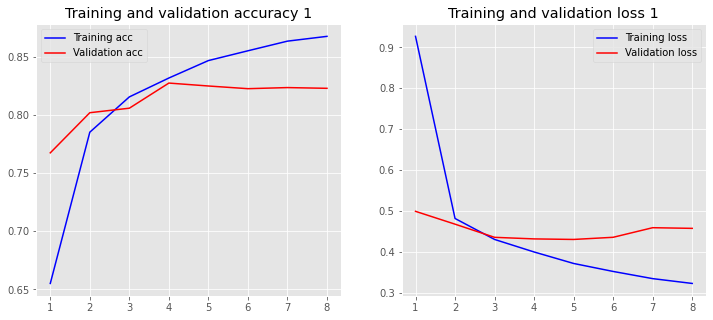

In [30]:
plot_history(history,1)

# model 2 sigmoid

In [31]:
model2 = Sequential([
    layers.Embedding(5000, 100, input_length=100),
    ##layers.Bidirectional(layers.LSTM(64, return_sequences=True, recurrent_dropout=0.4)),
    #layers.LSTM(64, return_sequences=True, recurrent_dropout=0.4),
    #layers.BatchNormalization(),
    layers.GlobalAveragePooling1D(),    # or layers.Flatten()
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(num_classes, activation='sigmoid')
])

ใช้ loss function  SparseCategoricalCrossentropy

In [32]:
model2.summary()
model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          500000    
                                                                 
 global_average_pooling1d_1   (None, 100)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 64)                6464      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 6)                 390       
                                                                 
Total params: 506,854
Trainable params: 506,854
Non-trainable params: 0
________________________________________________

In [33]:
import time
start = time.perf_counter()
early_stopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                         mode ="min", patience=3)

history2 = model2.fit(X_train, y_train,
                    epochs=20, 
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping], 
                    shuffle=True)

elapsed = time.perf_counter() - start
print('Elapsed %.3f seconds.' % elapsed)

Epoch 1/20
1193/1193 [==============================] - 5s 4ms/step - loss: 0.9313 - accuracy: 0.6510 - val_loss: 0.5211 - val_accuracy: 0.7866
Epoch 2/20
1193/1193 [==============================] - 4s 4ms/step - loss: 0.4790 - accuracy: 0.7962 - val_loss: 0.4531 - val_accuracy: 0.8108
Epoch 3/20
1193/1193 [==============================] - 5s 4ms/step - loss: 0.4249 - accuracy: 0.8226 - val_loss: 0.4366 - val_accuracy: 0.8078
Epoch 4/20
1193/1193 [==============================] - 4s 4ms/step - loss: 0.3935 - accuracy: 0.8383 - val_loss: 0.4466 - val_accuracy: 0.8239
Epoch 5/20
1193/1193 [==============================] - 5s 4ms/step - loss: 0.3647 - accuracy: 0.8529 - val_loss: 0.4264 - val_accuracy: 0.8245
Epoch 6/20
1193/1193 [==============================] - 5s 4ms/step - loss: 0.3494 - accuracy: 0.8593 - val_loss: 0.4344 - val_accuracy: 0.8141
Epoch 7/20
1193/1193 [==============================] - 5s 4ms/step - loss: 0.3328 - accuracy: 0.8669 - val_loss: 0.4390 - val_accuracy:

In [34]:
model2.evaluate(X_val,y_val)

299/299 [==============================] - 1s 2ms/step - loss: 0.4643 - accuracy: 0.8179


[0.46426475048065186, 0.8179054260253906]

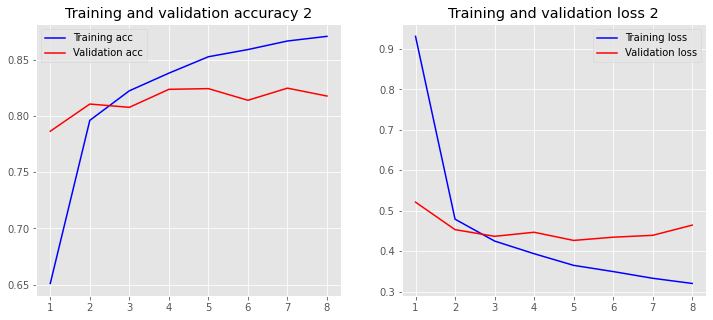

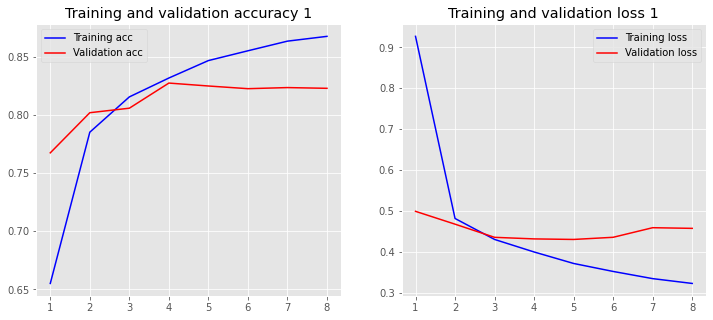

In [35]:
plot_history(history2,2)
plot_history(history,1)

# ตรงส่วนนี้ เอาไว้ predict ข้อความ

In [36]:
def predict_cyberbulling(stri):
    stri = word_tokenize(stri)
    token = tokenizertotal.texts_to_sequences([stri])

    embed = pad_sequences(token,padding='post',maxlen=100)
    predicti = model2.predict(embed)
    return encoder.classes_[np.argmax(predicti)]

In [37]:
x = input()
predict_cyberbulling(x)

'other_cyberbullying'

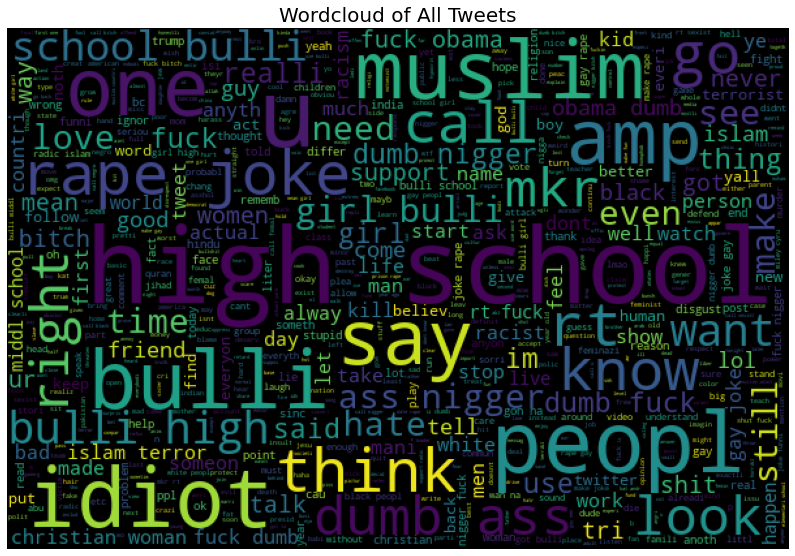

In [38]:
# Wordcloud of all Tweets
wordcloud = wc.WordCloud(stopwords = wc.STOPWORDS,
                         max_font_size = 80,
                         max_words = 5000,
                         width = 600,
                         height = 400,
                         background_color = 'black').generate(' '.join(txt for txt in df["tweet_text"]))
fig, ax = plt.subplots(figsize=(14,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.title('Wordcloud of All Tweets', size = 20)
plt.imshow(wordcloud);

In [39]:
type(model2)

keras.engine.sequential.Sequential